In [14]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("/Users/matthew941/Desktop/KORE208_team5/3. ·Ñå·Ö•·Üº·Ñé·Öµ·Ñã·Öµ·Ü´·Ñá·Öß·ÜØ ·Ñá·Öµ·Ü´·ÑÉ·Ö©, ·Ñã·ÖØ·ÑÉ·Ö≥·Ñã·Öµ·Ü∑·Ñá·Ö¶·ÑÉ·Öµ·Üº/2.·ÑÄ·Öµ·Ü∑·ÑÜ·ÖÆ·Ü´·Ñâ·ÖÆ/ÍπÄÎ¨∏Ïàò_tagged_filtered_ver2.csv")

In [16]:
import re

tokenized_sentences = [
    [token for token in sentence.split() if token.split("(")[0].lower() != "vs"]
    for sentence in df['tagged'].dropna()
]

In [17]:
from gensim.models import Word2Vec

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÎêú Î¨∏Ïû•ÏóêÏÑú Îã®Ïñ¥Îßå Ï∂îÏ∂ú (ex: 'ÎùºÎîîÏò§(NNG)' ‚Üí 'ÎùºÎîîÏò§') + 'vs' ÏÇ≠Ï†ú
sentences = df['tagged'].dropna().tolist()

# Ï†úÏô∏ÌïòÍ≥† Ïã∂ÏùÄ Îã®Ïñ¥
ban_words = {"vs", "ÏòÄÍ≥†", "D", "Ïù¥", "ÏóøÏÉà", "Î≥¥Î¶Ñ", "Ïó¥Ìùò", "Ïó∞Ïù¥ÌãÄ", "Îâ¥ÏãúÏä§",'ÍπÄ','ÌõÑÎ≥¥',"Í∏∞ÏûêÍπÄÏßÄÌò∏"}
ban_tags = {"VCP", "SL"}

# ÌïÑÌÑ∞ÎßÅ
tokenized_sentences = [
    [
        token.split('(')[0]
        for token in sentence.split()
        if token.split('(')[0].lower() not in ban_words and token.split('(')[-1][:-1] not in ban_tags
    ]
    for sentence in sentences
]


# Word2Vec ÌïôÏäµ (Skip-gram, sg=1)
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=3,
    sg=1,
    workers=4,
    seed=42
)

# Word2VecÏóê Ïã§Ï†ú Îì§Ïñ¥Í∞Ñ Îã®Ïñ¥Îßå Í∏∞Ï§ÄÏúºÎ°ú ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
word_to_tag = {}

for sentence in df['tagged'].dropna():
    for token in sentence.split():
        if "(" in token and ")" in token:
            word, tag = token.rsplit("(", 1)
            tag = tag.rstrip(")")
            # Îã®Ïñ¥Í∞Ä Word2Vec ÌïôÏäµÏóê Ïã§Ï†ú Ìè¨Ìï®Îêú Í≤ΩÏö∞Îßå
            if word in model.wv and word not in word_to_tag:
                word_to_tag[word] = tag



# ÍπÄÎ¨∏ÏàòÏôÄ Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ 50Í∞ú Ï∂îÏ∂ú

keyword = 'ÍπÄÎ¨∏Ïàò'

if keyword in model.wv:
    similar_words = model.wv.most_similar(keyword, topn=50)
    print(f"\n[{keyword}]Í≥º Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ (ÌíàÏÇ¨ Ìè¨Ìï®):")
    for word, sim in similar_words:
        tag = word_to_tag.get(word, "UNKNOWN")  # ÌíàÏÇ¨ ÏóÜÏúºÎ©¥ 'UNKNOWN'ÏúºÎ°ú Ï∂úÎ†•
        print(f"  {word} ({tag}) - {sim:.3f}")
else:
    print(f"'{keyword}' Îã®Ïñ¥Í∞Ä Word2Vec vocabularyÏóê ÏóÜÏäµÎãàÎã§.")


[ÍπÄÎ¨∏Ïàò]Í≥º Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ (ÌíàÏÇ¨ Ìè¨Ìï®):
  Ï∫°Ï≥ê (NNP) - 0.599
  Îß® (NNG) - 0.593
  Í¥ÄÏ†Ñ (NNG) - 0.590
  ÏúºÎä•Ï†ïÏù¥Í±∞Î¶¨ (NNP) - 0.587
  Í∏¥Ïû•Í∞ê (NNG) - 0.586
  ÍπÄÎ¨∏ (NNP) - 0.581
  Íµ≠ÎØºÏùòÌûò (NNP) - 0.580
  ÏÇºÏûê (NNG) - 0.580
  ÏôºÏ™Ω (NNG) - 0.580
  ÍπÄÏû¨Ïó∞ (NNP) - 0.579
  ÌïòÏö∞Ïä§ (NNP) - 0.577
  Ïã†Î¶º (NNP) - 0.575
  Î∞òÎÇòÏ†à (NNG) - 0.575
  Ï¥ùÌï© (NNG) - 0.574
  Ï∂îÏ≤® (NNG) - 0.573
  Îí§Ïûá (VV-I) - 0.573
  ÏòÅÏ≤úÏó≠ (NNP) - 0.571
  ÎåÄÍµ¨Í¥ëÏó≠Ïãú (NNP) - 0.570
  ÏóáÎπÑÏä∑ (XR) - 0.569
  ÍπÄÎèôÏó∞ (NNP) - 0.567
  Ïû•Î†®ÏÑ± (NNP) - 0.567
  ÍπÄÌù•Íµ≠ (NNP) - 0.566
  Í∏∞ÏÅò (VA) - 0.566
  Î∞îÏßù (MAG) - 0.566
  Îî∞ÎèåÎ¶¨ (VV) - 0.564
  ÍπÄÌï¥Ïãú (NNP) - 0.562
  Í∞ÅÍ∞Å (MAG) - 0.562
  ÏÜ°ÏùÄÏÑù (NNP) - 0.561
  Î∂ì (VV-I) - 0.561
  Ïä§ÏΩîÏñ¥ (NNG) - 0.560
  Í±∞Î®∏Ï•ê (VV) - 0.560
  Ïù∏Ï≤úÏãúÏ≤≠ (NNP) - 0.560
  Ìò∏Ïùò (NNG) - 0.559
  ÏãúÏ≤≠Í¥ëÏû• (NNP) - 0.558
  Î≤åÎ¶¨ (VV) - 0.558
  ÎåÄÏÑ† (NNG) - 0.558
  Îâ¥Ïä§Î∑∞Î¶¨Ìïë (NNP) - 0.558
  ÏÜêÎºâ (NNG) - 0

zsh:1: command not found: pip
zsh:1: command not found: pip


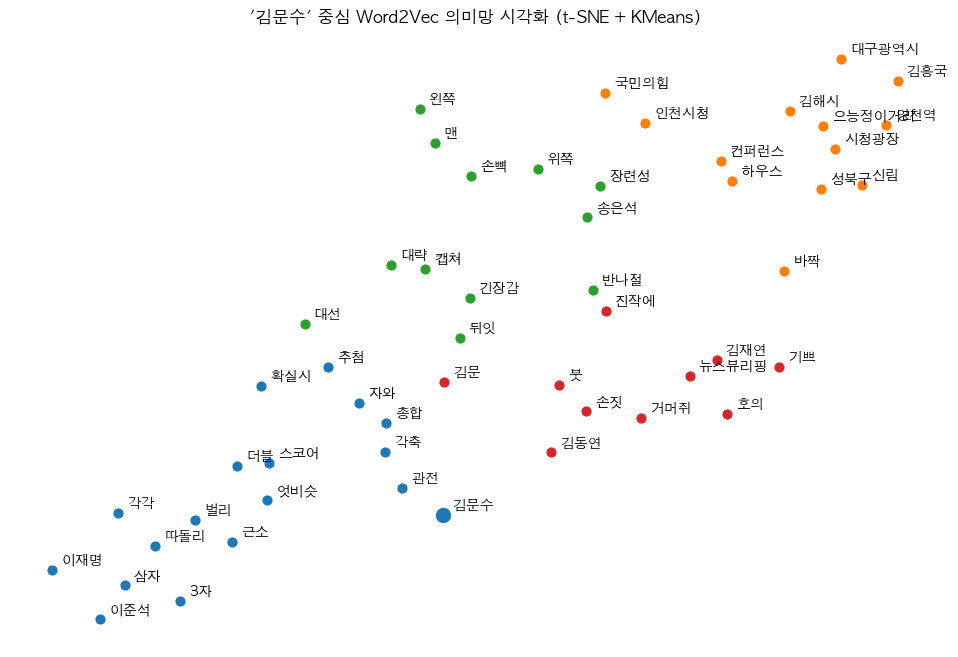

In [18]:
# 2D

import numpy as np

!pip install scikit-learn
!pip install matplotlib

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

# Ìè∞Ìä∏ ÏßÄÏ†ï
# mpl.rcParams['font.family'] = 'Malgun Gothic'
# mpl.rcParams['axes.unicode_minus'] = False


# macOSÏù∏ Í≤ΩÏö∞ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# Ïú†ÏÇ¨ Îã®Ïñ¥ 50Í∞ú
similar_tuples = model.wv.most_similar(keyword, topn=50)
similar_words = [keyword] + [word for word, _ in similar_tuples]

# ÌïÑÏàò Îã®Ïñ¥ Ìè¨Ìï®
must_include = ['Ïù¥Ïû¨Î™Ö', 'Ïù¥Ï§ÄÏÑù']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# t-SNE Ï∞®Ïõê Ï∂ïÏÜå (‚òÖ n_iter Ï†úÍ±∞Ìï®!)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    plt.scatter(x, y, c=f"C{labels[i]}", s=100 if word == keyword else 40)
    plt.text(x + 0.5, y + 0.5, word, fontsize=10)
plt.title(f"'{keyword}' Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (t-SNE + KMeans)")
plt.axis('off')
plt.show()

zsh:1: command not found: pip
zsh:1: command not found: pip


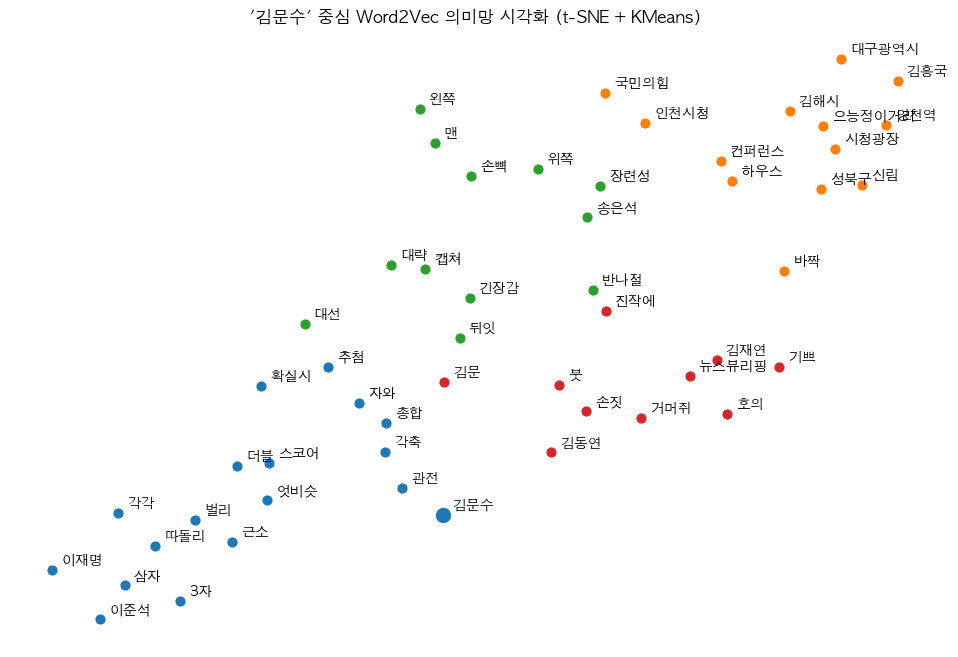

In [19]:
# 2D

import numpy as np

!pip install scikit-learn
!pip install matplotlib

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

# Ìè∞Ìä∏ ÏßÄÏ†ï
# mpl.rcParams['font.family'] = 'Malgun Gothic'
# mpl.rcParams['axes.unicode_minus'] = False

# macOSÏù∏ Í≤ΩÏö∞ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# Ïú†ÏÇ¨ Îã®Ïñ¥ 50Í∞ú
similar_tuples = model.wv.most_similar(keyword, topn=50)
similar_words = [keyword] + [word for word, _ in similar_tuples]

# ÌïÑÏàò Îã®Ïñ¥ Ìè¨Ìï®
must_include = ['Ïù¥Ïû¨Î™Ö', 'Ïù¥Ï§ÄÏÑù']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# t-SNE Ï∞®Ïõê Ï∂ïÏÜå (‚òÖ n_iter Ï†úÍ±∞Ìï®!)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    plt.scatter(x, y, c=f"C{labels[i]}", s=100 if word == keyword else 40)
    plt.text(x + 0.5, y + 0.5, word, fontsize=10)
plt.title(f"'{keyword}' Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (t-SNE + KMeans)")
plt.axis('off')
plt.show()

zsh:1: command not found: pip
zsh:1: command not found: pip


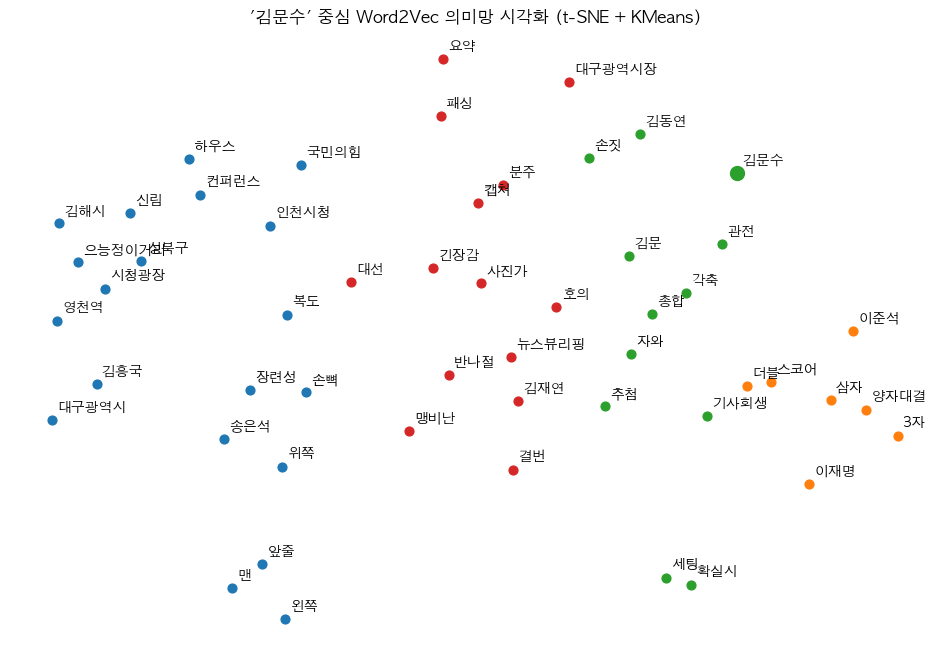

In [20]:
# 2D + Î™ÖÏÇ¨Îßå

import numpy as np

!pip install scikit-learn
!pip install matplotlib

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

# Ìè∞Ìä∏ ÏßÄÏ†ï
# mpl.rcParams['font.family'] = 'Malgun Gothic'
# mpl.rcParams['axes.unicode_minus'] = False

# macOSÏù∏ Í≤ΩÏö∞ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# Ïú†ÏÇ¨ Îã®Ïñ¥ 50Í∞ú
all_similar = model.wv.most_similar(keyword, topn=500)  # ÎÑâÎÑâÌïòÍ≤å ÎΩëÍ∏∞
noun_similar = [word for word, sim in all_similar if word_to_tag.get(word, "").startswith("NN")]

# ÏµúÏ¢Ö Ïú†ÏÇ¨ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏: Ï§ëÏã¨ Îã®Ïñ¥ + Î™ÖÏÇ¨ 50Í∞ú
similar_words = [keyword] + noun_similar[:50]

# ÌïÑÏàò Îã®Ïñ¥ Ìè¨Ìï®
must_include = ['Ïù¥Ïû¨Î™Ö', 'Ïù¥Ï§ÄÏÑù']
for word in must_include:
    if word not in similar_words and word in model.wv:
        similar_words.append(word)

# Î≤°ÌÑ∞ Ï∂îÏ∂ú
word_vectors = np.array([model.wv[word] for word in similar_words])

# t-SNE Ï∞®Ïõê Ï∂ïÏÜå (‚òÖ n_iter Ï†úÍ±∞Ìï®!)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vec_2d = tsne.fit_transform(word_vectors)

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_2d)


# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))

for i, word in enumerate(similar_words):
    x, y = vec_2d[i]
    tag = word_to_tag.get(word, "UNK")

    plt.scatter(x, y, c=f"C{labels[i]}", s=100 if word == keyword else 40)
    plt.text(x + 0.5, y + 0.5, f"{word}", fontsize=10)

plt.title(f"'{keyword}' Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (t-SNE + KMeans)")
plt.axis('off')
plt.show()

In [ ]:
pip install plotly

In [ ]:
# 3D

import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.io as pio

# üîß Î∏åÎùºÏö∞Ï†ÄÎ°ú Ï∂úÎ†•ÎêòÎèÑÎ°ù ÏÑ§Ï†ï
pio.renderers.default = "browser"

# 1. Ïú†ÏÇ¨ Îã®Ïñ¥ Ï∂îÏ∂ú
similar_tuples = model.wv.most_similar(keyword, topn=50)
similar_words = [keyword] + [word for word, _ in similar_tuples]
word_vectors = np.array([model.wv[word] for word in similar_words])

# 2. 3Ï∞®Ïõê t-SNE
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
vec_3d = tsne.fit_transform(word_vectors)

# 3. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(vec_3d)

# 4. Plotly ÏãúÍ∞ÅÌôî
fig = go.Figure()

for i in range(4):
    idx = [j for j, label in enumerate(labels) if label == i]
    fig.add_trace(go.Scatter3d(
        x=vec_3d[idx, 0],
        y=vec_3d[idx, 1],
        z=vec_3d[idx, 2],
        mode='markers+text',
        marker=dict(size=[10 if similar_words[j] == keyword else 5 for j in idx]),
        text=[similar_words[j] for j in idx],
        name=f'Cluster {i+1}',
        textposition='top center'
    ))

fig.update_layout(
    title=f"'{keyword}' Ï§ëÏã¨ Word2Vec ÏùòÎØ∏Îßù ÏãúÍ∞ÅÌôî (3D t-SNE + KMeans)",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()